In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [151]:
census_data = {
     "age" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks102ew.xls",
     "education" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks501ew.xls",
     "economic" : "http://webarchive.nationalarchives.gov.uk/20160105160709/http://www.ons.gov.uk/ons/rel/census/2011-census/key-statistics-for-local-authorities-in-england-and-wales/rft-table-ks601ew.xls",
}

In [143]:
df = pd.read_csv("http://www.electoralcommission.org.uk/__data/assets/file/0014/212135/EU-referendum-result-data.csv", usecols=["Area_Code", "Remain", "Leave"] )

In [149]:
df.columns
len(df)

382

In [150]:
df.head(2)

,Area_Code,Remain,Leave
0,E06000031,34176,53216
1,E06000032,36708,47773


In [162]:
any(df.Area_Code == "E06000032")

True

In [191]:
edu = pd.read_excel(io=census_data["education"], sheetname="KS501EW_Numbers", header=10, parse_cols=("A,G,K"), skiprows=[11,12,13])
edu.dropna(how='all', inplace=True)
edu.rename(index=str, inplace=True, columns={
        "Area code": "Area_Code", 
        "Highest level of qualification: Level 4 qualifications and above": "High_edu",
        "Highest level of qualification: Level 1 qualifications": "Low_edu",
    })
len(edu)

396

In [192]:
edu.head(2)

,Area_Code,Low_edu,High_edu
1,K04000001,6047384.0,12383477.0
3,E92000001,5714441.0,11769361.0


In [193]:
res = pd.merge(df, edu, on='Area_Code')

In [194]:
len(res)

342

In [195]:
res.head()

,Area_Code,Remain,Leave,Low_edu,High_edu
0,E06000031,34176,53216,22288.0,29245.0
1,E06000032,36708,47773,22813.0,34814.0
2,E06000033,39348,54522,23075.0,30691.0
3,E06000034,22151,57765,22396.0,21519.0
4,E06000055,41497,44569,17313.0,35417.0


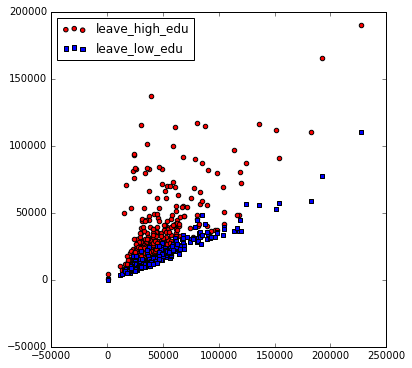

In [196]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1,1,1) # one row, one column, first plot

# could also take res.Remain ...
ax.scatter(res.Leave, res.High_edu, s=20, c='r', marker="o", label='leave_high_edu')
ax.scatter(res.Leave, res.Low_edu, s=20, c='b', marker="s", label='leave_low_edu')

plt.legend(loc='upper left');
plt.show()

#fig.savefig("brexit_vote_with_census_table.png")